In [1]:
#Importing required packages.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline
import random

C:\Users\brian\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#load the data in text form separated by commas
brainT = np.loadtxt('Braintumor.csv', delimiter = ',', skiprows = 1)

In [3]:
#check the shape
print(brainT.shape)

(3762, 14)


In [4]:
#change the format so calculations and reading are easier
np.set_printoptions(formatter = {'float': '{: 0.1f}'.format})

In [5]:
# Shuffle the datasets
import random
brainT 
np.random.shuffle(brainT)
print(brainT)

[[ 0.0  16.1  767.6 ...  4.3  1.0  0.0]
 [ 0.0  8.2  383.9 ...  3.1  1.0  0.0]
 [ 1.0  13.5  1370.0 ...  7.7  1.0  0.0]
 ...
 [ 0.0  7.4  555.9 ...  3.1  1.0  0.0]
 [ 1.0  6.6  771.2 ...  4.3  1.0  0.0]
 [ 0.0  5.3  210.0 ...  2.5  1.0  0.0]]


In [6]:
#Dropping column #1
brainT = np.delete(brainT, 1, axis = 1)
print(brainT)

[[ 0.0  767.6  27.7 ...  4.3  1.0  0.0]
 [ 0.0  383.9  19.6 ...  3.1  1.0  0.0]
 [ 1.0  1370.0  37.0 ...  7.7  1.0  0.0]
 ...
 [ 0.0  555.9  23.6 ...  3.1  1.0  0.0]
 [ 1.0  771.2  27.8 ...  4.3  1.0  0.0]
 [ 0.0  210.0  14.5 ...  2.5  1.0  0.0]]


In [7]:
# Split into training and validation, 30% validation set and 70% training 
index_30percent = int(0.3 * len(brainT[:, 0]))
print(index_30percent)
XVALID = brainT[:index_30percent, 1:]
YVALID = brainT[:index_30percent, :1]
XTRAIN = brainT[index_30percent:, 1:]
YTRAIN = brainT[index_30percent:, :1]

1128


In [8]:
#import tensorflow for neuron netowrk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [9]:
#build model for Training
model = Sequential()
model.add(Dense(4, input_dim = len(XTRAIN[0, :]), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

Epoch 1/500
83/83 [==============================] - 1s 7ms/step - loss: 49.9917 - accuracy: 0.5600 - val_loss: 27.4866 - val_accuracy: 0.5745
Epoch 2/500
83/83 [==============================] - 0s 4ms/step - loss: 22.1883 - accuracy: 0.5300 - val_loss: 8.3504 - val_accuracy: 0.5089
Epoch 3/500
83/83 [==============================] - 0s 4ms/step - loss: 4.5583 - accuracy: 0.4313 - val_loss: 1.1195 - val_accuracy: 0.4131
Epoch 4/500
83/83 [==============================] - 0s 4ms/step - loss: 0.8426 - accuracy: 0.4423 - val_loss: 0.8015 - val_accuracy: 0.4362
Epoch 5/500
83/83 [==============================] - 0s 4ms/step - loss: 0.7430 - accuracy: 0.4533 - val_loss: 0.7762 - val_accuracy: 0.4371
Epoch 6/500
83/83 [==============================] - 0s 4ms/step - loss: 0.7299 - accuracy: 0.4518 - val_loss: 0.7675 - val_accuracy: 0.4406
Epoch 7/500
83/83 [==============================] - 0s 4ms/step - loss: 0.7244 - accuracy: 0.4848 - val_loss: 0.7441 - val_accuracy: 0.5585
Epoch 8/50

Epoch 59/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6761 - accuracy: 0.5592 - val_loss: 0.6734 - val_accuracy: 0.5700
Epoch 60/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6763 - accuracy: 0.5592 - val_loss: 0.6722 - val_accuracy: 0.5718
Epoch 61/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6733 - accuracy: 0.5607 - val_loss: 0.6728 - val_accuracy: 0.5718
Epoch 62/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6712 - accuracy: 0.5623 - val_loss: 0.6697 - val_accuracy: 0.5727
Epoch 63/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6703 - accuracy: 0.5604 - val_loss: 0.6672 - val_accuracy: 0.5771
Epoch 64/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6689 - accuracy: 0.5611 - val_loss: 0.6664 - val_accuracy: 0.5780
Epoch 65/500
83/83 [==============================] - 0s 4ms/step - loss: 0.6664 - accuracy: 0.5626 - val_loss: 0.6643 - val_accuracy: 0.5824
Epoch 

83/83 [==============================] - 0s 4ms/step - loss: 0.1313 - accuracy: 0.9544 - val_loss: 0.1561 - val_accuracy: 0.9486
Epoch 174/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9544 - val_loss: 0.4378 - val_accuracy: 0.8387
Epoch 175/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1390 - accuracy: 0.9571 - val_loss: 0.1580 - val_accuracy: 0.9548
Epoch 176/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1278 - accuracy: 0.9601 - val_loss: 0.1509 - val_accuracy: 0.9530
Epoch 177/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1301 - accuracy: 0.9556 - val_loss: 0.1656 - val_accuracy: 0.9415
Epoch 178/500
83/83 [==============================] - 0s 3ms/step - loss: 0.1245 - accuracy: 0.9617 - val_loss: 0.1544 - val_accuracy: 0.9512
Epoch 179/500
83/83 [==============================] - 0s 4ms/step - loss: 0.1298 - accuracy: 0.9533 - val_loss: 0.1771 - val_accuracy: 0.9424
Epoch 180/500

83/83 [==============================] - 0s 5ms/step - loss: 0.1010 - accuracy: 0.9639 - val_loss: 0.2069 - val_accuracy: 0.9255
Epoch 288/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0998 - accuracy: 0.9639 - val_loss: 0.1214 - val_accuracy: 0.9619
Epoch 289/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0923 - accuracy: 0.9681 - val_loss: 0.1176 - val_accuracy: 0.9645
Epoch 290/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0931 - accuracy: 0.9681 - val_loss: 0.1216 - val_accuracy: 0.9628
Epoch 291/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0926 - accuracy: 0.9677 - val_loss: 0.1675 - val_accuracy: 0.9415
Epoch 292/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0952 - accuracy: 0.9681 - val_loss: 0.1711 - val_accuracy: 0.9397
Epoch 293/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0911 - accuracy: 0.9670 - val_loss: 0.1533 - val_accuracy: 0.9477
Epoch 294/500

83/83 [==============================] - 0s 5ms/step - loss: 0.0844 - accuracy: 0.9757 - val_loss: 0.1269 - val_accuracy: 0.9610
Epoch 402/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0883 - accuracy: 0.9681 - val_loss: 0.1037 - val_accuracy: 0.9654
Epoch 403/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0787 - accuracy: 0.9723 - val_loss: 0.1168 - val_accuracy: 0.9681
Epoch 404/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0821 - accuracy: 0.9715 - val_loss: 0.2342 - val_accuracy: 0.9238
Epoch 405/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0852 - accuracy: 0.9711 - val_loss: 0.1000 - val_accuracy: 0.9761
Epoch 406/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0828 - accuracy: 0.9730 - val_loss: 0.1039 - val_accuracy: 0.9654
Epoch 407/500
83/83 [==============================] - 0s 5ms/step - loss: 0.0800 - accuracy: 0.9734 - val_loss: 0.1399 - val_accuracy: 0.9530
Epoch 408/500

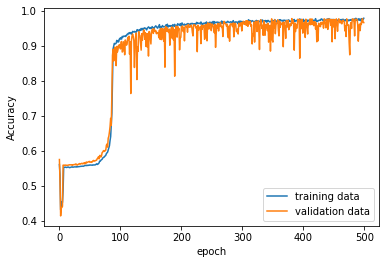

In [10]:
#compile and fit the model with 500 epochs
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['accuracy'])

checkpoint = ModelCheckpoint('N5check.h5', monitor = 'val_accuracy', save_best_only = True, mode = 'max', verbose = 1)

# Do the training (specify the validation set as well)
history = model.fit(XTRAIN, YTRAIN, validation_data = (XVALID, YVALID), verbose = 1, epochs = 500)

# Check what's in the history
print(history.params)

# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [11]:
accuracy = model.evaluate(XTRAIN, YTRAIN)

83/83 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9814


In [12]:
accuracy = model.evaluate(XVALID, YVALID)

36/36 [==============================] - 0s 3ms/step - loss: 0.1006 - accuracy: 0.9663


In [13]:
print(YTRAIN[:5])
predictions = model.predict(XTRAIN)
print(predictions[:5])

[[ 1.0]
 [ 0.0]
 [ 1.0]
 [ 0.0]
 [ 0.0]]
83/83 [==============================] - 0s 3ms/step
[[ 1.0]
 [ 0.1]
 [ 0.7]
 [ 0.4]
 [ 0.0]]


In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
precision = precision_score(YTRAIN, predictions.round())
print(precision)
recall = recall_score(YTRAIN, predictions.round())
print(recall)
f1 = f1_score(YTRAIN,predictions.round())
print(f1)

0.9773489932885906
0.9814658803706824
0.9794031105506515


In [15]:
print(YVALID[:5])
predictions = model.predict(XVALID)
print(predictions[:5])

[[ 0.0]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]]
36/36 [==============================] - 0s 3ms/step
[[ 0.6]
 [ 0.0]
 [ 1.0]
 [ 1.0]
 [ 0.0]]


In [16]:
precision = precision_score(YVALID, predictions.round())
print(precision)
recall = recall_score(YVALID, predictions.round())
print(recall)
f1 = f1_score(YVALID,predictions.round())
print(f1)

0.9543650793650794
0.969758064516129
0.962
